In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

c:\Users\chun\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ds_salaries_df = pd.read_csv("Resources/ds_salaries.csv")
del ds_salaries_df["Unnamed: 0"]

ds_renamed_df = ds_salaries_df.rename(columns={"work_year":"Work Year",
                                              "experience_level":"Experience Level",
                                              "employment_type":"Employment Type",
                                              "job_title":"Job Title",
                                              "salary":"Salary",
                                              "salary_currency":"Salary Currency",
                                              "salary_in_usd": "Salary in USD",
                                              "employee_residence":"Employee Residence",
                                              "remote_ratio":"Remote Ratio",
                                              "company_location":"Company Location",
                                              "company_size":"Company Size"})

ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [12]:
top=7

ds_top_df=ds_renamed_df.copy()
series_top=ds_renamed_df["Job Title"].value_counts().head(top).keys()

list_top=[]
for i in series_top:
    list_top.append(i)

for index, row in ds_renamed_df.iterrows():
    if row[3] not in list_top:
        ds_top_df.loc[index,'Job Title']='Others'

In [4]:
ds_top_df['Job Title'].value_counts()

Others                       155
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: Job Title, dtype: int64

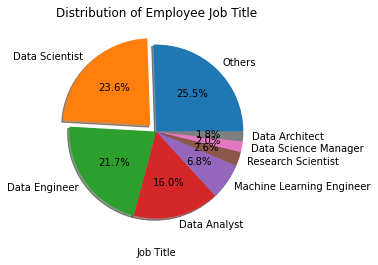

In [5]:
job_title = ds_top_df.groupby('Job Title')
count_job_title=job_title['Job Title'].count().sort_values(ascending=False)

explode = (0, 0.1, 0, 0, 0, 0, 0, 0 )

plt.pie(count_job_title, labels=count_job_title.index,  explode=explode,autopct='%1.1f%%', startangle=0, shadow=True)
plt.xlabel("Job Title")
plt.title("Distribution of Employee Job Title")
plt.show() 

In [13]:
ds_top_df_bar=ds_top_df.loc[ds_top_df['Job Title']!='Others']

job_title = ds_top_df_bar.groupby(["Job Title"])

salary_mean = job_title["Salary in USD"].mean()
salary_median = job_title["Salary in USD"].median()
salary_var = job_title["Salary in USD"].var()
salary_std = job_title["Salary in USD"].std()
salary_count = job_title["Salary in USD"].count()

In [15]:
salary_job_title_summary_df = pd.DataFrame({"Mean": salary_mean,
                         "Median": salary_median,
                         "Variance": salary_var,
                         "Std Deviation": salary_std,
                         "Count":salary_count
                          })


In [16]:
bar_df=salary_job_title_summary_df.sort_values('Mean',ascending=False).copy()
bar_df.reset_index(inplace=True)
bar_df

,Job Title,Mean,Median,Variance,Std Deviation,Count
0,Data Architect,177873.909091,180000.0,2.089836e+09,45714.721424,11
1,Data Science Manager,158328.500000,155750.0,2.765622e+09,52589.180497,12
2,Data Engineer,112725.000000,105500.0,3.321111e+09,57629.082107,132
3,Research Scientist,109019.500000,76263.5,9.710676e+09,98542.763968,16
4,Data Scientist,108187.832168,103691.0,4.110456e+09,64112.840519,143
5,Machine Learning Engineer,104880.146341,87932.0,3.996595e+09,63218.626439,41
6,Data Analyst,92893.061856,90320.0,1.596888e+09,39961.075848,97


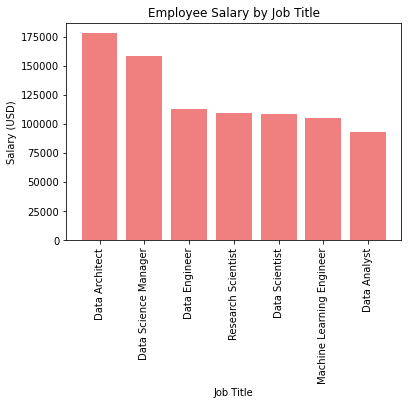

In [11]:
x_axis=np.arange(len(bar_df['Job Title']))
tick_locations=[value+0 for value in x_axis]

plt.bar(x_axis,bar_df['Mean'],color='lightcoral')
plt.title('Employee Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(tick_locations,labels=bar_df['Job Title'], rotation=90)
plt.show()

# Highest Salary
The highest salary of job title which sample size more than 7 is ___'Data Architect'___. US $177874 is average salary of 11 employees.